# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.  
* Load each XLS or XLSX file in your Jupyter notebook.  For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
1. Plot the distribution of data points using a histogram
1. Create a lag plot (a lag plot shows t versus t+1)
1. Based on the lag plot, state in a markdown cell whether the order of this data matters. 
1. Do one of the following (not both):
    1. If the order of the data matters, then interpolate the missing values
    1. If the order of the data does not matter, fill in the missing data by sampling from the distribution
    1. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
    1. Perform interpolation or sampling programmatically using Python (not manually)

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

In [2]:
df = pd.read_excel('imputation_homework_12.xlsx')
df.shape

(108, 3)

In [3]:
df

,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00
...,...,...,...
103,103,6.55,35.75
104,104,6.60,36.00
105,105,6.65,36.25
106,106,6.70,36.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  108 non-null    int64  
 1   x           99 non-null     float64
 2   y           108 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.7 KB


In [5]:
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [6]:
uniq_per_col(df,5)

====  Unnamed: 0 has 108 unique entries ====
0     1
68    1
79    1
78    1
77    1
Name: Unnamed: 0, dtype: int64
====  x has 99 unique entries ====
1.40    1
5.40    1
5.25    1
5.20    1
5.15    1
Name: x, dtype: int64
====  y has 108 unique entries ====
10.00    1
27.00    1
29.75    1
29.50    1
29.25    1
Name: y, dtype: int64


In [7]:
df.isnull().sum()

Unnamed: 0    0
x             9
y             0
dtype: int64

In [8]:
df1 = pd.read_excel('imputation_homework_32.xls')
df1.shape

(500, 3)

In [9]:
df1

,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655
...,...,...,...
495,495,9.90,-2.938926
496,496,9.92,-0.506655
497,497,9.94,-0.665052
498,498,9.96,-2.419020


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   time        500 non-null    float64
 2   value       452 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [11]:
def uniq_per_col(df1,count):
    for this_column in df1.columns:
        print("==== ",this_column,"has",df1[this_column].nunique(),"unique entries ====")
        print(df1[this_column].value_counts().head(count))

In [12]:
uniq_per_col(df1,5)

====  Unnamed: 0 has 500 unique entries ====
0      1
329    1
342    1
341    1
340    1
Name: Unnamed: 0, dtype: int64
====  time has 500 unique entries ====
0.00    1
6.58    1
6.84    1
6.82    1
6.80    1
Name: time, dtype: int64
====  value has 438 unique entries ====
 6.426248    3
-4.310881    2
-4.755283    2
-6.813549    2
 4.755283    2
Name: value, dtype: int64


In [13]:
df1.isnull().sum()

Unnamed: 0     0
time           0
value         48
dtype: int64

In [14]:
df2 = pd.read_excel('imputation_homework_78.xlsx')
df2.shape

(852, 3)

In [15]:
df2

,Unnamed: 0,date,value
0,0,2015-11-03,13.394304
1,1,2015-11-04,-3.800715
2,2,2015-11-05,28.098152
3,3,2015-11-06,20.500562
4,4,2015-11-07,33.981955
...,...,...,...
847,847,2018-02-27,14.469096
848,848,2018-02-28,30.466798
849,849,2018-03-01,13.722157
850,850,2018-03-02,16.117787


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  852 non-null    int64         
 1   date        852 non-null    datetime64[ns]
 2   value       771 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 20.1 KB


In [17]:
def uniq_per_col(df2,count):
    for this_column in df2.columns:
        print("==== ",this_column,"has",df2[this_column].nunique(),"unique entries ====")
        print(df2[this_column].value_counts().head(count))

In [18]:
uniq_per_col(df2,5)

====  Unnamed: 0 has 852 unique entries ====
0      1
560    1
562    1
563    1
564    1
Name: Unnamed: 0, dtype: int64
====  date has 852 unique entries ====
2015-11-03    1
2017-05-16    1
2017-05-18    1
2017-05-19    1
2017-05-20    1
Name: date, dtype: int64
====  value has 771 unique entries ====
13.394304    1
24.933836    1
13.253596    1
10.611269    1
28.095330    1
Name: value, dtype: int64


In [19]:
df2.isnull().sum()

Unnamed: 0     0
date           0
value         81
dtype: int64

## Count the missing values 

In [20]:
df_xnull=df['x'].isna().sum()
print('Null Value-X:',df_xnull)
df_ynull=df['y'].isna().sum()
print('Null Value-Y:',df_ynull)

Null Value-X: 9
Null Value-Y: 0


In [21]:
df1_xnull=df1['time'].isna().sum()
print('Null Value-Time:',df1_xnull)
df1_ynull=df1['value'].isna().sum()
print('Null Value-Value:',df1_ynull)

Null Value-Time: 0
Null Value-Value: 48


## Distribution of data points 

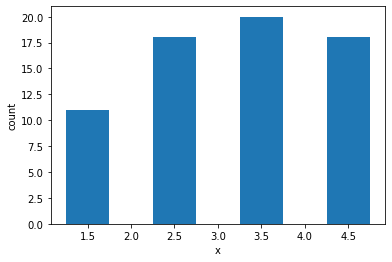

In [22]:
plt.hist(df['x'], bins=range(int(df['x'].min()),int(df['x'].max())), rwidth=.5)
#plt.title('File 2 x')
plt.xlabel('x')
plt.ylabel('count')
plt.show()

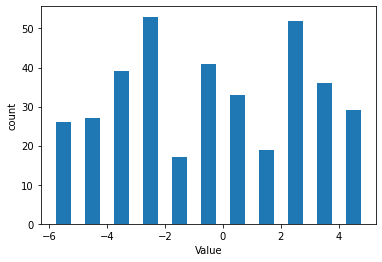

In [23]:
plt.hist(df1['value'], bins=range(int(df1['value'].min()),int(df1['value'].max())), rwidth=.5)
plt.xlabel('Value')
plt.ylabel('count')
plt.show()

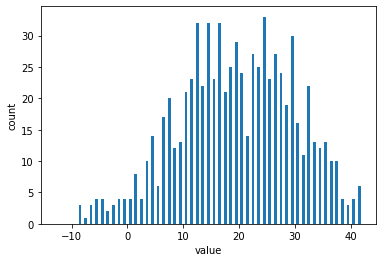

In [24]:
plt.hist(df2['value'], bins=range(int(df2['value'].min()),int(df2['value'].max())), rwidth=.5)
plt.xlabel('value')
plt.ylabel('count')
plt.show()


## Lag plot 

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

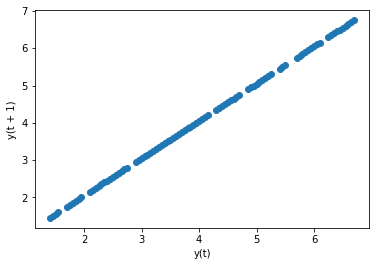

In [25]:
pd.plotting.lag_plot(df['x'])

 - Order matters for the file, x

- Order matters for the file, value

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

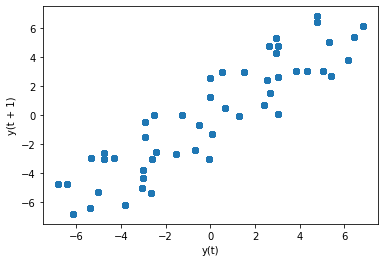

In [26]:
pd.plotting.lag_plot(df1['value'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

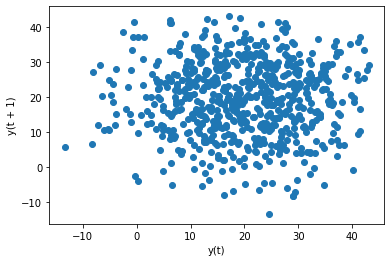

In [27]:
pd.plotting.lag_plot(df2['value'])

- Order does not matters for the file, value

## Interpolate the missing values

In [28]:
df=df.interpolate()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

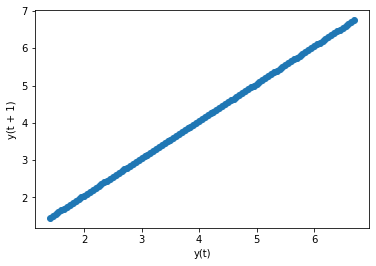

In [29]:
pd.plotting.lag_plot(df['x'])

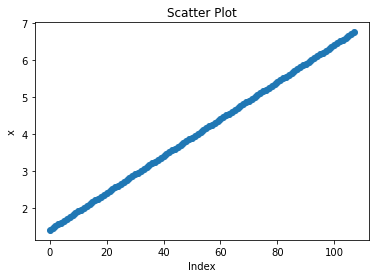

In [30]:
plt.scatter(df.index, df['x'])
plt.title('Scatter Plot')
plt.ylabel('x')
plt.xlabel('Index')
plt.show()

In [31]:
df1=df1.interpolate()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

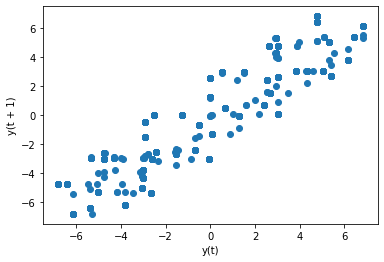

In [32]:
pd.plotting.lag_plot(df1['value'])

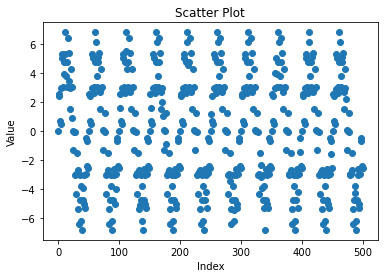

In [33]:
plt.scatter(df1.index, df1['value'])
plt.title('Scatter Plot')
plt.ylabel('Value')
plt.xlabel('Index')
plt.show()